**<h1> Manipulating Images </h1>**


Estimated time needed: **30** minutes


<h2>Objectives</h2>


In this lab, you will learn how to manipulate images, OpenCV image Arrays. You will learn how to copy an image to avoid aliasing. We will cover flipping images and cropping images. You will also learn to change pixel images; this will allow you to draw shapes, write text and superimpose images over other images.


<ul>
    <li><a href='#MI'>Manipulating Images </a>
        <ul>
            <li>Copying Images  </li>
            <li>Fliping Images </li>
            <li>Cropping an Image </li>
            <li>Changing Specific Image Pixels </li>
     
  
    
</ul>


----


Download the images for the lab


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cat.png -O cat.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png

'wget' is not recognized as an internal or external command,
operable program or batch file.


'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


We will be using these imported functions in the lab


In [2]:
import matplotlib.pyplot as plt   # Import thư viện matplotlib để hiển thị hình ảnh
import cv2                        # Import thư viện OpenCV để xử lý ảnh
import numpy as np                # Import thư viện NumPy để xử lý mảng

## Copying Images


If you want to reassign an array to another variable, you should use the `copy` method. If we do not apply the method `copy()`, the variable will point to the same location in memory. Consider the following array:


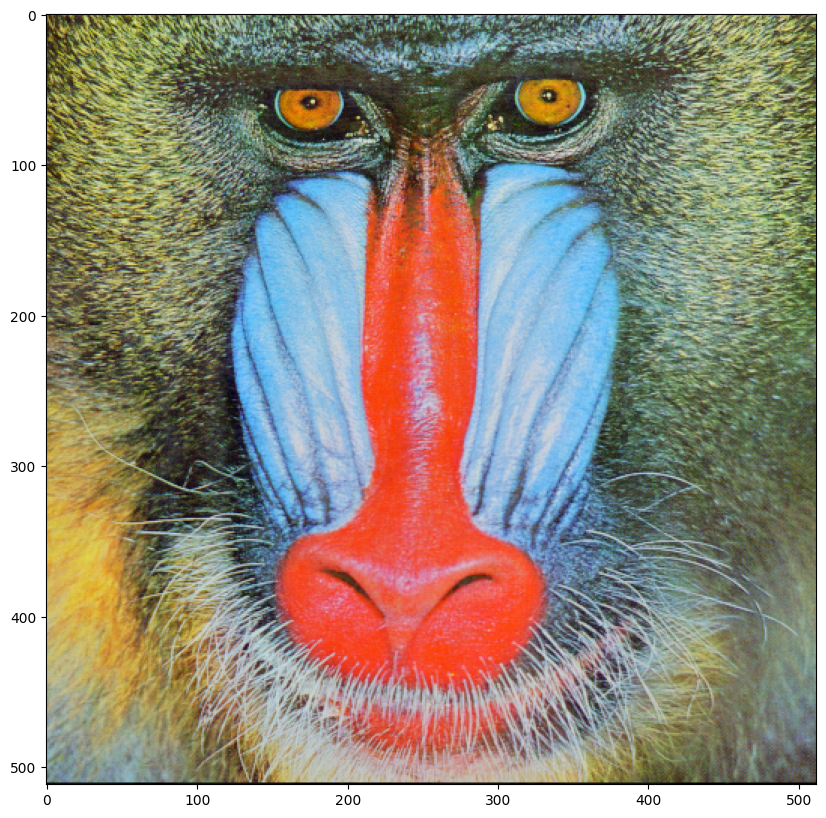

In [3]:
baboon = cv2.imread("baboon.png")                      # Đọc ảnh baboon từ nơi lưu ảnh
plt.figure(figsize=(10,10))                            # Thiết lập kích thước hình ảnh hiển thị
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))    # Hiển thị ảnh baboon sau khi chuyển đổi sang định dạng màu RGB
plt.show()                                             # Hiển thị ảnh

If we do not apply the method `copy()`, the new variable will point to the same location in memory:


In [4]:
A = baboon           # Tạo tên mới = A cho cùng một ảnh baboon

we use the `id` function to find the object's memory address; we see it is the same as the original array.


In [5]:
id(A)==id(baboon)    # Kiểm tra xem biến A và baboon có cùng tham chiếu bộ nhớ không bằng cách so sánh id của chúng
id(A)                # Hiển thị id của biến A

2664331525456

If we apply the method `copy()</coode>, the memory address is different 


In [6]:
B = baboon.copy()    # Tạo bản sao ảnh độc lập trong bộ nhớ từ ảnh baboon gốc với tên biến B
id(B)==id(baboon)    # Kiểm tra xem biến B và baboon có cùng tham chiếu bộ nhớ không bằng cách so sánh id của chúng

False

When we do not apply the method <code>copy()</code>, the variable will point to the same location in memory. Consider the array <code>baboon</code>, if we set all its values to zero, then all the values in <code>A</code> will be zero. This is because <code>baboon</code> and <code>A</code> point to the same place in memory, but <code>B</code> will not be affected. 


In [7]:
baboon[:,:,] = 0     # Lấy toàn bộ dữ liệu ảnh baboon và gán giá trị 0 cho tất cả các kênh màu (Blue, Green, Red)

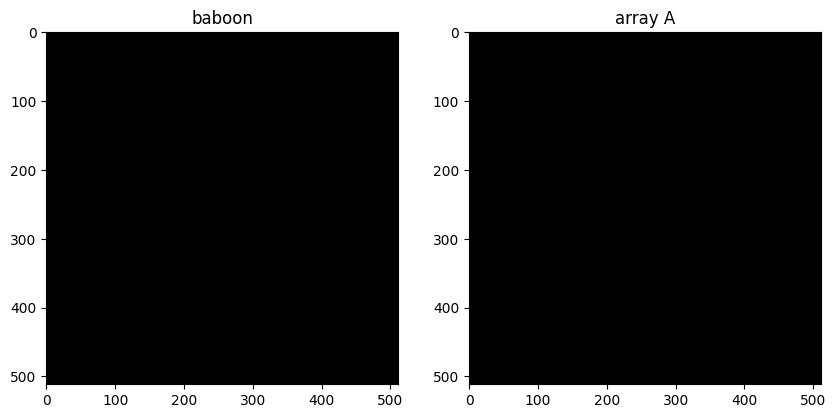

In [8]:
plt.figure(figsize=(10,10))                             # Thiết lập kích thước hình ảnh hiển thị
plt.subplot(121)                                        # Chia hình thành 1 hàng, 2 cột, chọn vị trí thứ 1 để hiển thị ảnh
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))     # Hiển thị ảnh baboon sau khi đã bị gán giá trị 0 cho tất cả các kênh màu
plt.title("baboon")                                     # Tiêu đề cho ảnh baboon
plt.subplot(122)                                        # Chia hình thành 1 hàng, 2 cột, chọn vị trí thứ 2 để hiển thị ảnh
plt.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB))          # Hiển thị ảnh A (ảnh baboon ban đầu)
plt.title("array A")                                    # Tiêu đề cho ảnh A
plt.show()                                              # Hiển thị ảnh

We see they are the same, this is called aliasing. Aliasing happens whenever one variable's value is assigned to another variable because variables are just names that store references to values. We can also compare <code>baboon</code> and array <code>B</code>:


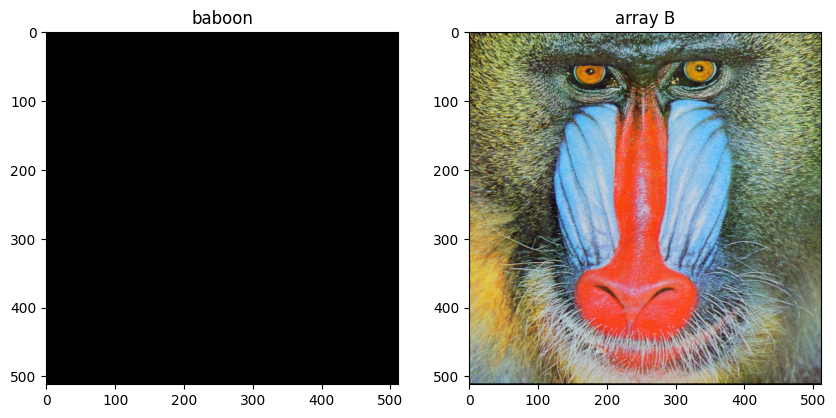

In [9]:
plt.figure(figsize=(10,10))                            # Thiết lập kích thước hình ảnh hiển thị
plt.subplot(121)                                       # Chia hình thành 1 hàng, 2 cột, chọn vị trí thứ 1 để hiển thị ảnh
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))    # Hiển thị ảnh baboon sau khi đã bị gán giá trị 0 cho tất cả các kênh màu
plt.title("baboon")                                    # Tiêu đề cho ảnh baboon
plt.subplot(122)                                       # Chia hình thành 1 hàng, 2 cột, chọn vị trí thứ 2 để hiển thị ảnh
plt.imshow(cv2.cvtColor(B, cv2.COLOR_BGR2RGB))         # Hiển thị ảnh B (bản sao ảnh baboon ban đầu)
plt.title("array B")                                   # Tiêu đề cho ảnh B
plt.show()                                             # Hiển thị ảnh


They are different because they used the method copy.


## Fliping Images 


Flipping images involves reordering the index of the pixels such that it changes the orientation of the image. Consider the following image:


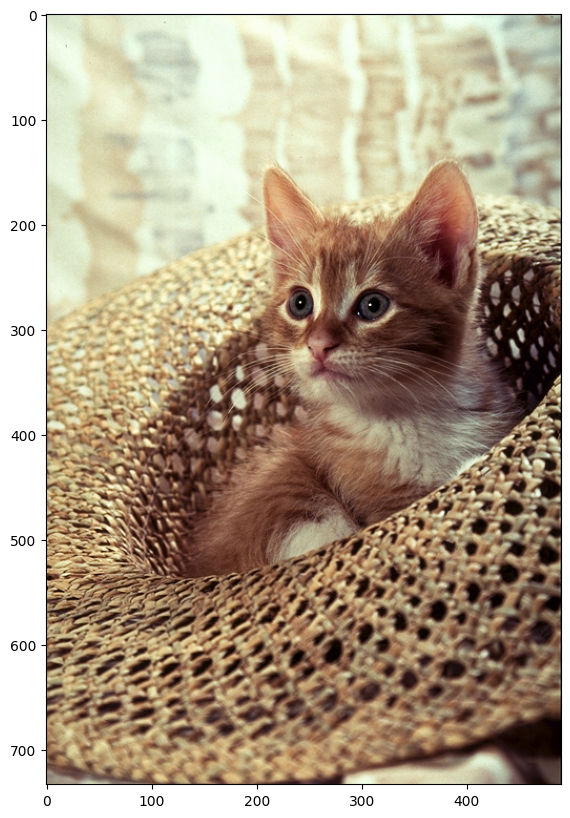

In [ ]:
image = cv2.imread("cat.png")                        # Mở hình ảnh cat.png sử dụng OpenCV và gán nó cho biến image
plt.figure(figsize=(10,10))                          # Thiết lập kích thước hình ảnh hiển thị 10x10 inch
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))   # Hiển thị hình ảnh cat sau khi chuyển đổi sang định dạng màu RGB
plt.show()                                           # Hiển thị ảnh đã được thiết lập

We can cast it to an array and find the shape:


In [11]:
width, height,C=image.shape                 # Lấy kích thước chiều rộng, chiều cao và số kênh màu của ảnh và gán chúng cho các biến tương ứng
print('width, height,C',width, height,C)    # In ra kích thước chiều rộng, chiều cao và số kênh màu của ảnh

width, height,C 733 490 3


Let's Flip i.e rotate it vertically. First, we create an array of equal size of type <code>np.uint8</code> bit image.


In [ ]:
array_flip = np.zeros((width, height,C),dtype=np.uint8)     # Lật ảnh cat theo chiều ngang bằng cách tạo một mảng mới với cùng kích thước
                                                            # và kiểu dữ liệu với ảnh gốc, np.uint8 và gán giá trị 0 ban đầu

We assign the first row of pixels of the original array to the new array's last row. We repeat the process for every row, incrementing the row number for the original array and decreasing the new array's row index assigning the pixels accordingly.


In [ ]:
for i,row in enumerate(image):           # Sử dụng vòng lặp for để duyệt qua từng hàng (row) của ảnh gốc cùng với chỉ số hàng (i)
        array_flip[width-1-i,:,:]=row    # Gán hàng hiện tại của ảnh gốc vào vị trí tương ứng từ dưới lên trong mảng array_flip

We plot the results


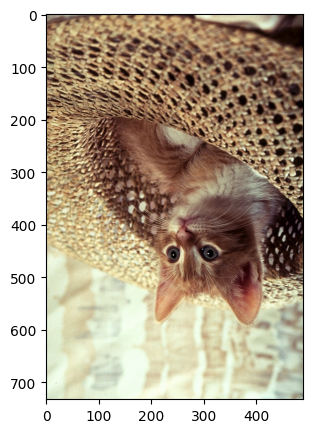

In [ ]:
plt.figure(figsize=(5,5))                                   # Thiết lập kích thước hình ảnh hiển thị 5x5 inch   
plt.imshow(cv2.cvtColor(array_flip, cv2.COLOR_BGR2RGB))     # Hiển thị ảnh đã được lật theo chiều ngang sau khi chuyển đổi sang định dạng màu RGB
plt.show()                                                  # Hiển thị ảnh

<code>OpenCV</code>has several ways to flip an image, we can use  the <code>flip()</code> function; we have the input image array. The parameter is the <code>flipCode</code>

is the value indicating what kind of flip we would like to perform; 
<li><code>flipcode</code> = 0: flip vertically around the x-axis</li>
<li><code>flipcode</code> > 0: flip horizontally around y-axis positive value</li>
<li><code>flipcode</code>&#60 0: flip vertically and horizontally, flipping around both axes negative value</li>
Let apply different <code>flipcode</code>'s in a loop:


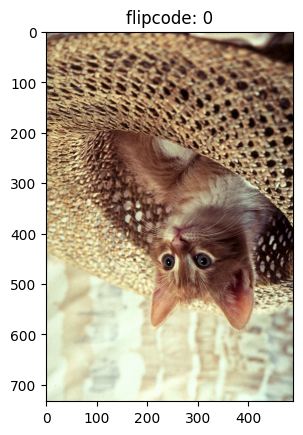

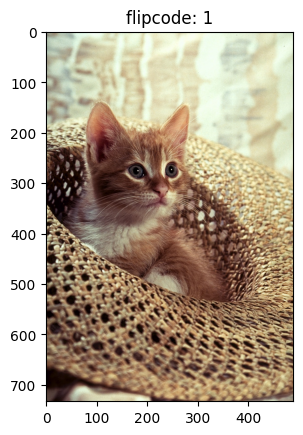

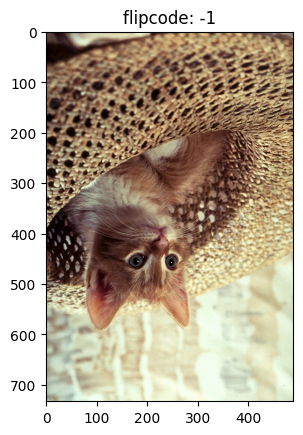

In [ ]:
for flipcode in [0,1,-1]:                                # Sử dụng vòng lặp for để lật ảnh cat theo các chiều khác nhau dựa trên giá trị flipcode
    im_flip =  cv2.flip(image,flipcode )                 # Lật ảnh cat dựa trên giá trị flipcode và gán kết quả vào biến im_flip
    plt.imshow(cv2.cvtColor(im_flip,cv2.COLOR_BGR2RGB))  # Hiển thị ảnh đã được lật sau khi chuyển đổi sang định dạng màu RGB
    plt.title("flipcode: "+str(flipcode))                # Tiêu đề cho ảnh hiển thị giá trị flipcode hiện tại 
    plt.show()

We can also use the <code>rotate()</code> function. The parameter is an integer indicating what kind of flip we would like to perform. 


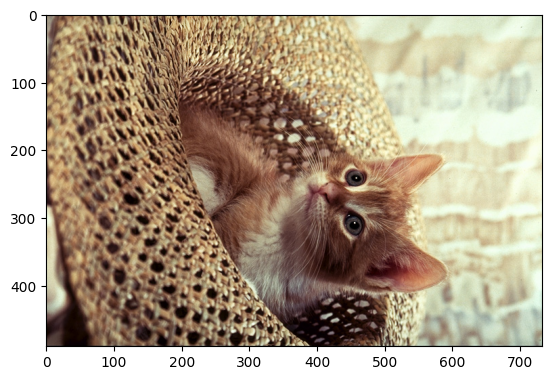

In [ ]:
im_flip = cv2.rotate(image,0)                         # Xoay ảnh cat 90 độ theo chiều kim đồng hồ và gán kết quả vào biến im_flip
plt.imshow(cv2.cvtColor(im_flip,cv2.COLOR_BGR2RGB))   # Hiển thị ảnh đã được xoay sau khi chuyển đổi sang định dạng màu RGB
plt.show()

OpenCV module has built-in attributes the describe the type of flip, the values are just integers. Several are shown in the following <code>dict</code>:


In [ ]:
flip = {"ROTATE_90_CLOCKWISE":cv2.ROTATE_90_CLOCKWISE,"ROTATE_90_COUNTERCLOCKWISE":cv2.ROTATE_90_COUNTERCLOCKWISE,"ROTATE_180":cv2.ROTATE_180}
# Tạo từ điển flip để lưu các phương thức xoay ảnh với tên tương ứng

We see the keys are just an integer


In [18]:
flip["ROTATE_90_CLOCKWISE"]   # Phương thức xoay ảnh 90 độ theo chiều kim đồng hồ từ từ điển flip

0

We can plot each of the outputs using the different  parameter values 


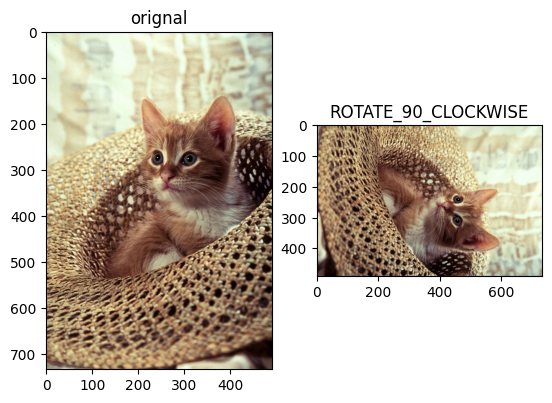

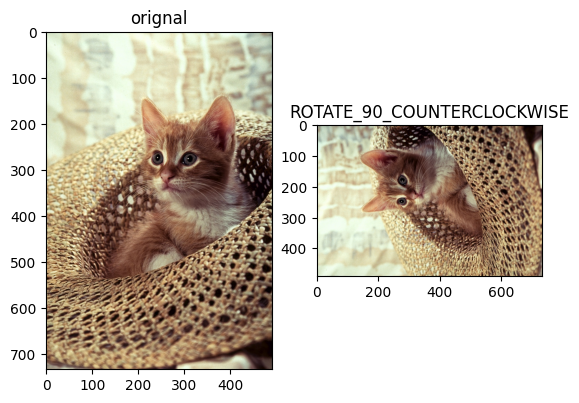

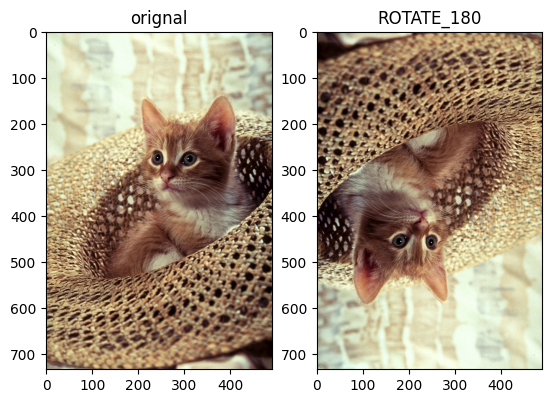

In [ ]:
for key, value in flip.items():                                           # Sử dụng vòng lặp for để duyệt qua từng cặp key-value trong từ điển flip
    plt.subplot(1,2,1)                                                    # Chia hình thành 1 hàng, 2 cột, chọn vị trí thứ 1 để hiển thị ảnh
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))                    # Hiển thị ảnh gốc sau khi chuyển đổi sang định dạng màu RGB
    plt.title("orignal")                                                  # Tiêu đề cho ảnh gốc
    plt.subplot(1,2,2)                                                    # Chia hình thành 1 hàng, 2 cột, chọn vị trí thứ 2 để hiển thị ảnh
    plt.imshow(cv2.cvtColor(cv2.rotate(image,value), cv2.COLOR_BGR2RGB))  # Hiển thị ảnh đã được xoay dựa trên giá trị value từ điển flip sau khi chuyển đổi sang định dạng màu RGB
    plt.title(key)                                                        # Tiêu đề cho ảnh hiển thị tên phương thức xoay hiện tại
    plt.show()                                                            # Hiển thị ảnh

 ## Cropping an Image


Cropping is "cutting out" the part of the image and throwing out the rest; we can crop using arrays. Let start with a vertical crop; the variable <code>upper</code> is the first row that we would like to include in the image, the variable <code>lower</code> is the last row we would like to include. We then use slicing to obtain the new image. 


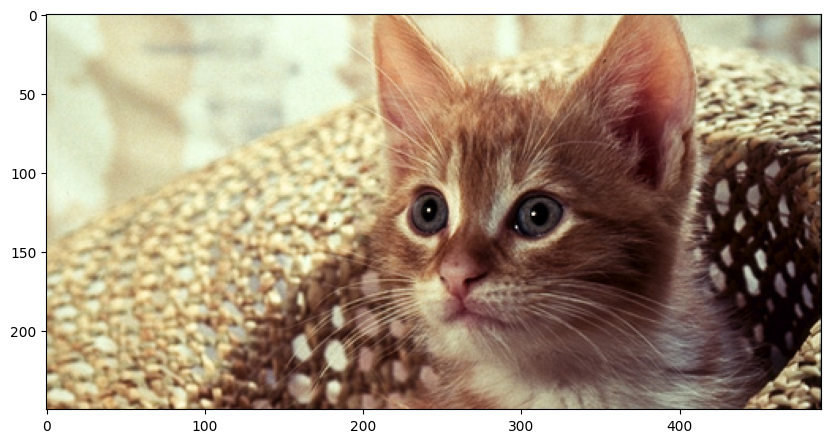

In [ ]:
upper = 150                                              # Xác định vị trí cắt ảnh từ hàng 150
lower = 400                                              # Xác định vị trí cắt ảnh đến hàng 400
crop_top = image[upper: lower,:,:]                       # Cắt ảnh cat từ hàng 150 đến hàng 400 và giữ nguyên tất cả các cột và kênh màu
plt.figure(figsize=(10,10))                              # Thiết lập kích thước hình ảnh hiển thị 10x10 inch
plt.imshow(cv2.cvtColor(crop_top, cv2.COLOR_BGR2RGB))    # Hiển thị ảnh đã được cắt từ hàng 150 đến hàng 400 sau khi chuyển đổi sang định dạng màu RGB
plt.show()                                               # Hiển thị ảnh đã được cắt

consider the array <code>crop_top</code> we  can also crop horizontally  the variable right is the first column that we would like to include in the image, the variable left is the last column we would like to include in the image.


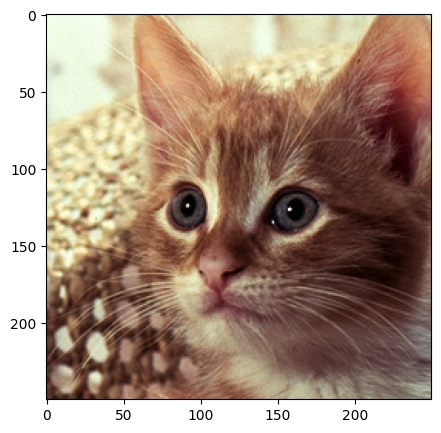

In [ ]:
left = 150                                                      # Xác định vị trí cắt ảnh từ cột 150
right = 400                                                     # Xác định vị trí cắt ảnh đến cột 400
crop_horizontal = crop_top[: ,left:right,:]                     # Cắt ảnh crop_top từ cột 150 đến cột 400 và giữ nguyên tất cả các hàng và kênh màu
plt.figure(figsize=(5,5))                                       # Thiết lập kích thước hình ảnh hiển thị 5x5 inch
plt.imshow(cv2.cvtColor(crop_horizontal, cv2.COLOR_BGR2RGB))    # Hiển thị ảnh đã được cắt từ cột 150 đến cột 400 sau khi chuyển đổi sang định dạng màu RGB
plt.show()                                                      # Hiển thị ảnh đã được cắt

## Changing Specific Image Pixels


We can change specific image pixels using  array indexing; for example, we can set  all the channels in the original image we cropped to zero :


In [ ]:
array_sq = np.copy(image)                      # Tạo bản sao ảnh cat gốc và gán nó cho biến array_sq
array_sq[upper:lower,left:right,:] = 0         # Đặt vùng hình vuông được xác định bởi upper, lower, left và right thành màu đen (giá trị 0) trong bản sao ảnh

We can compare the results to the new image. 


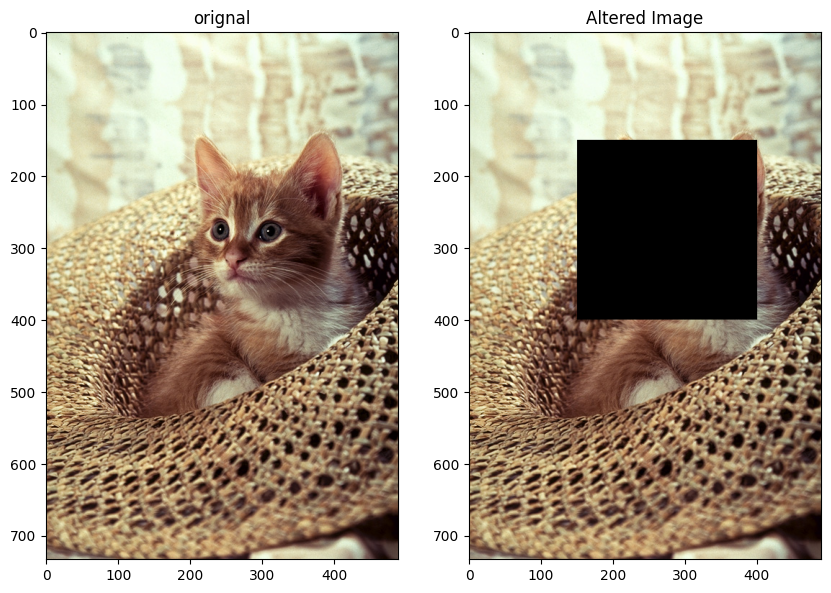

In [ ]:
plt.figure(figsize=(10,10))                              # Thiết lập kích thước hình ảnh hiển thị 10x10 inch
plt.subplot(1,2,1)                                       # Chia hình thành 1 hàng, 2 cột, chọn vị trí thứ 1 để hiển thị ảnh             
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))        # Hiển thị ảnh cat gốc sau khi chuyển đổi sang định dạng màu RGB
plt.title("orignal")                                     # Tiêu đề cho ảnh gốc
plt.subplot(1,2,2)                                       # Chia hình thành 1 hàng, 2 cột, chọn vị trí thứ 2 để hiển thị ảnh
plt.imshow(cv2.cvtColor(array_sq,cv2.COLOR_BGR2RGB))     # Hiển thị ảnh đã được chỉnh sửa (vùng hình vuông màu đen) sau khi chuyển đổi sang định dạng màu RGB
plt.title("Altered Image")                               # Tiêu đề cho ảnh B
plt.show()                                               # Hiển thị ảnh

  We can also create shapes and <code>OpenCV</code>, we can use the method <code>rectangle</code>. The parameter  <code>pt1</code> is the top-left coordinate of the rectangle: <code>(left,top)</code> or $(x_0,y_0)$, <code>pt2</code> is the bottom right coordinate<code>(right,lower)</code> or $(x_1,y_1)$. The parameter <code>color</code>  is a tuple representing the intensity of each channel <code>( blue, green, red)</code>. Finally, we have the line thickness.


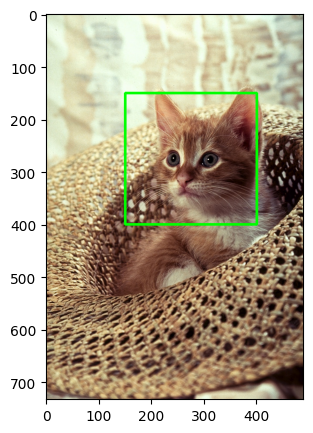

In [ ]:
start_point, end_point = (left, upper),(right, lower)      # Xác định điểm bắt đầu và kết thúc của hình chữ nhật sử dụng tọa độ left, upper, right và lower      
image_draw = np.copy(image)            # Tạo bản sao ảnh cat gốc để vẽ hình chữ nhật lên đó
cv2.rectangle(image_draw, pt1=start_point, pt2=end_point, color=(0, 255, 0), thickness=3)    # Vẽ hình chữ nhật màu xanh lá cây với độ dày 3 pixel trên bản sao ảnh tại vị trí được xác định bởi start_point và end_point
plt.figure(figsize=(5,5))              # Thiết lập kích thước hình ảnh hiển thị 5x5 inch
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))  # Hiển thị ảnh đã vẽ hình chữ nhật sau khi chuyển đổi sang định dạng màu RGB
plt.show()     # Hiển thị ảnh

We can overlay text on an image using the function  <code>putText</code> with the following parameter values:



 <li><code>img</code>: Image array </li>
<li><code>text</code>: Text string to be overlayed</li>
<li><code>org</code>: Bottom-left corner of the text string in the image</li>
<li><code>fontFace</code>: tye type of font </li>
<li><code>fontScale</code>: Font scale</li>
<li><code>color</code>: Text color</li>
<li><code>thickness</code>: Thickness of the lines used to draw a text</li>
<li><code>lineType:</code> Line type</li>


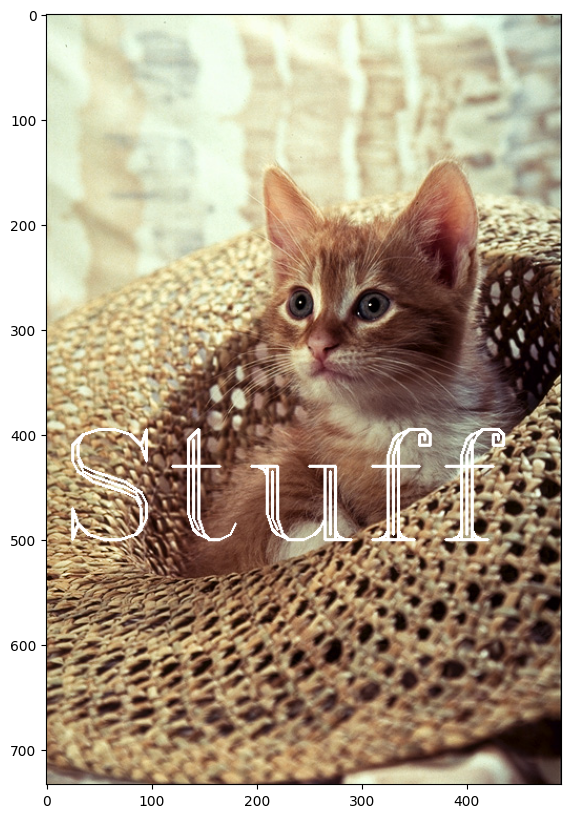

In [ ]:
image_draw=cv2.putText(img=image,text='Stuff',org=(10,500),color=(255,255,255),fontFace=4,fontScale=5,thickness=2)  # Vẽ chữ 'Stuff' lên ảnh cat tại vị trí (10,500) với màu trắng, font chữ số 4, kích thước 5 và độ dày 2 pixel
plt.figure(figsize=(10,10))         # Thiết lập kích thước hình ảnh hiển thị 10x10 inch
plt.imshow(cv2.cvtColor(image_draw,cv2.COLOR_BGR2RGB))   # Hiển thị ảnh đã vẽ chữ 'Stuff' sau khi chuyển đổi sang định dạng màu RGB
plt.show()     # Hiển thị ảnh

### Question-4: 
Use the image baboon.png from this lab or take any image you like.

Open the image and create a OpenCV Image object called `im`, convert the image from BGR format to RGB format, flip `im` vertically around the x-axis and create an image called `im_flip`, mirror `im` by flipping it horizontally around the y-axis and create an image called `im_mirror`, finally plot both images


In [26]:
# write your code here


Double-click **here** for a hint.

<!-- The hint is below:

im_flip =  cv2.flip(baboon,0)
im_mirror =  cv2.flip(baboon, 1)

-->


Double-click **here** for the solution.

<!-- The answer is below:

im = cv2.imread("baboon.png")

im_flip =  cv2.flip(im, 0)
plt.imshow(cv2.cvtColor(im_flip, cv2.COLOR_BGR2RGB))
plt.show()

im_mirror =  cv2.flip(im, 1)
plt.imshow(cv2.cvtColor(im_mirror, cv2.COLOR_BGR2RGB))
plt.show()

-->


# References 


[1]  Images were taken from: https://homepages.cae.wisc.edu/~ece533/images/
    
[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html'>Pillow Docs</a>

[3]  <a href='https://opencv.org/'>Open CV</a>

[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).


<!--<h2>Change Log</h2>-->


<!--
<table>
    <tr>
        <th>Date (YYYY-MM-DD)</th>
        <th>Version</th>
        <th>Changed By</th>
        <th>Change Description</th>
    </tr>
    <tr>
        <td>2020-07-20</td>
        <td>0.2</td>
        <td>Azim</td>
        <td>Modified Multiple Areas</td>
    </tr>
    <tr>
        <td>2020-07-17</td>
        <td>0.1</td>
        <td>Azim</td>
        <td>Created Lab Template</td>
    </tr>
    <tr>
        <td>2021-03-06</td>
        <td>0.3</td>
        <td>Nayef</td>
        <td>Modified some codes</td>
    </tr>
</table>
-->


<h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
